In [13]:
## Importing libraries
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt



### Codebook
- `limit_bal`: Amount of the given credit in dollars: it includes both the individual consumer credit and his/her family (supplementary) credit.

- `sex`: Gender (1 = male; 2 = female).

- `education`: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

- `marriage`: Marital status (1 = married; 2 = single; 3 = others).

- `age`: Age (year).

- `pay_1:pay_6`: History of past payment. We tracked the past monthly payment records (from April to September) as follows: <br>
    `pay_1` = the repayment status in September; <br>
    `pay_2` = the repayment status in August; . . .; <br>
    `pay_6` = the repayment status in April. <br>
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

- `bill_amt1:bill_amt6`: Amount of bill statement in dollars. <br>
    `bill_amt1` = amount of bill statement in September; <br>
    `bill_amt2` = amount of bill statement in August; . . .; <br>
    `bill_amt6` = amount of bill statement in April.

- `pay_amt1:pay_amt6`: Amount of previous payment in dollars. <br>
    `pay_amt1` = amount paid in September; <br>
    `pay_amt2` = amount paid in August; . . .;<br>
    `pay_amt6` = amount paid in April.

- `default_oct`: response in ${yes, no}$ of default in October

In [5]:
## Reading the data
file_path = '../Data/train(1).csv'
df = pd.read_csv(file_path)

In [8]:
df.head()

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_oct
0,1,1500,2.0,1.0,2.0,23.0,0.0,0.0,0.0,2.0,2.0,0.0,1452,1503,1482,1463,938.0,698.0,75,150,86,0,50.0,50.0,yes
1,2,8500,2.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,8079,8175,8300,8364,8275.0,8425.0,300,400,315,300,325.0,305.0,no
2,3,1000,1.0,1.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,733,831,896,933,772.0,794.0,150,150,150,24,105.0,110.0,no
3,4,10500,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,7049,7011,7077,7190,7229.0,7340.0,255,260,258,260,265.0,307.0,no
4,5,10500,2.0,2.0,1.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,4487,4501,3533,3558,3592.0,3496.0,180,155,145,130,135.0,200.0,no


In [9]:
## Converting the predictor variable to a binary values
df['default_oct'] = df['default_oct'].apply(lambda x: 1 if x == 'yes' else 0)

In [11]:
## Some Stats
df.describe(include='all')

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_oct
count,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,23819.000000,22790.000000,24001.000000,24001.000000,24001.000000,24001.000000,23819.000000,22790.000000,24001.000000,24001.000000,24001.000000,24001.000000,23819.000000,22790.000000,24001.000000
mean,12001.000000,8351.302029,1.604058,1.856839,1.551644,35.498438,-0.015874,-0.132119,-0.166201,-0.215824,-0.263403,-0.286529,2574.245865,2467.107037,2359.795592,2175.804383,2024.383559,1960.335981,281.079955,298.237073,263.109704,243.367943,238.731139,256.517069,0.221199
std,6928.636241,6475.592450,0.489062,0.792152,0.522663,9.222021,1.123554,1.199237,1.196802,1.173350,1.135120,1.152145,3706.812804,3585.952168,3499.639871,3244.170936,3063.487512,3015.469078,846.819525,1215.481369,899.406651,782.138847,779.341974,861.106314,0.415063
min,1.000000,500.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-8279.000000,-3488.000000,-3075.000000,-8500.000000,-4066.000000,-10452.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6001.000000,2500.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,177.000000,147.000000,130.000000,116.000000,90.000000,62.000000,49.000000,41.000000,19.000000,15.000000,12.000000,6.000000,0.000000
50%,12001.000000,7000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1123.000000,1059.000000,1007.000000,953.000000,906.000000,855.500000,105.000000,100.000000,90.000000,75.000000,75.000000,75.000000,0.000000
75%,18001.000000,12000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3375.000000,3202.000000,3015.000000,2752.000000,2510.500000,2466.000000,250.000000,250.000000,227.000000,200.000000,200.000000,200.000000,0.000000
max,24001.000000,50000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,48225.000000,49196.000000,83204.000000,44579.000000,46358.000000,48083.000000,43677.000000,84212.000000,44802.000000,31050.000000,21326.000000,26433.000000,1.000000


##### Key Observations

1. Null values exists in pay_5, pay_6, bill_amt5, bill_amt6, pay_amt5, pay_amt6
2. Minimum limit for a person is 500 and maximum is 50k. Wide dispersion in limit. lower limit might indicate higher chance of default. Need more analysis to determine.
3. Mean for sex is 1.6 indicating more female population than Male (Female -> 2, Male -> 1)
4. Wide range of Age is captured in the dataset from 21 till 79. Age groups might show different default behaviour. Age related risk patterns can be analysed. 
5. Sex, Education and Marriage

### Correlation Analysis

In [14]:
correlation_matrix = df.corr()

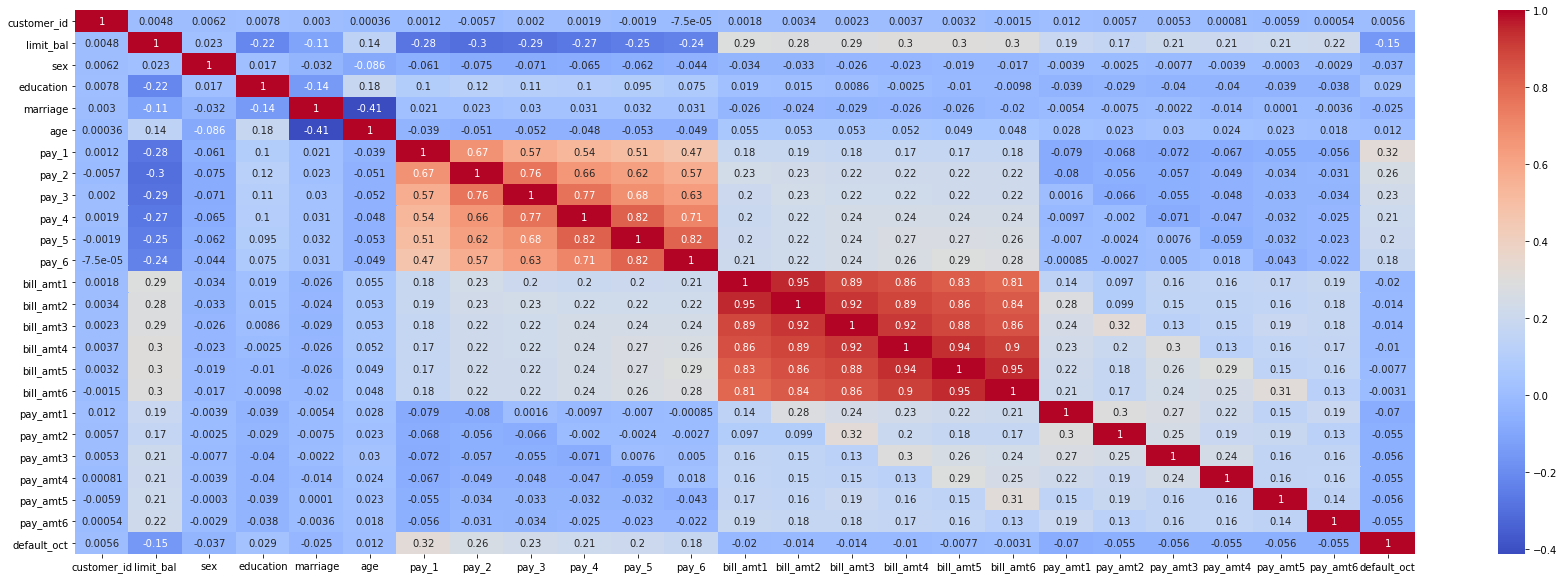

In [17]:
plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

##### Key Observations

1. pay info has relatively high correlation to person having a default. Pay_1 has the highest correlation compared to other features, meaning If a person already has delayed for a longer duration in the first month i.e sep payment, higher the risk of default. <br>
2. Credit limit has negative correlation meaning higher credit limits are associated with lower default risk.

### Visualizing the dataset to draw some key observations

No handles with labels found to put in legend.
No handles with labels found to put in legend.


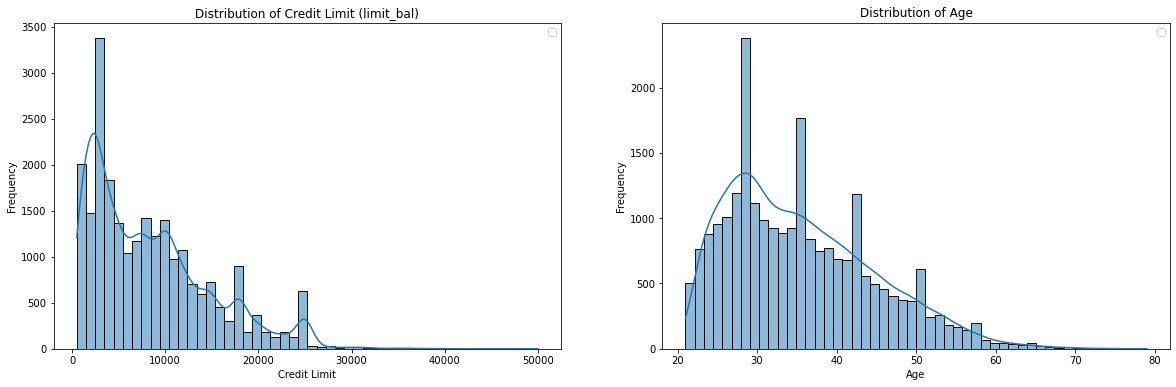

In [21]:
# Distribution of Credit Limit
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['limit_bal'], bins=50, kde=True)
plt.title('Distribution of Credit Limit (limit_bal)')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.legend()

# Distribution of Age
plt.subplot(1, 2, 2)
sns.histplot(df['age'], bins=50, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.show()

##### Key Observations

1. Most customers have lower credit limits indicated by a skewed distribution. <br>
2. Customers' ages are widely distributed, with a concentration around the mid-30s.

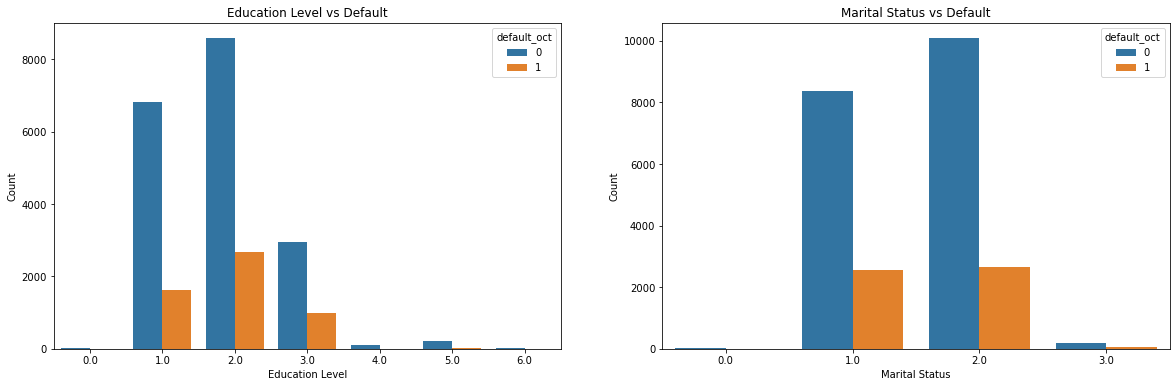

In [25]:
plt.figure(figsize=(20, 6))

# Bar plot for Education vs Default
plt.subplot(1, 2, 1)
sns.countplot(x='education', hue='default_oct', data=df)
plt.title('Education Level vs Default')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Bar plot for Marriage vs Default
plt.subplot(1, 2, 2)
sns.countplot(x='marriage', hue='default_oct', data=df)
plt.title('Marital Status vs Default')
plt.xlabel('Marital Status')
plt.ylabel('Count')

plt.show()

##### Key Observations
No observations can be derived. All education level are likely prone to default and all Marital Status are likely prone to default. 

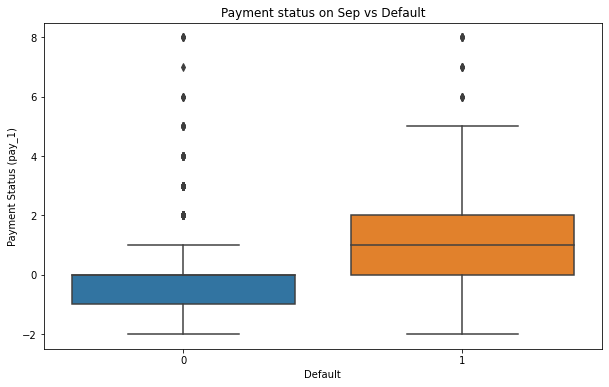

In [30]:
# Box plot for Payment Status on Sep vs Default
plt.figure(figsize=(10, 6))
sns.boxplot(x='default_oct', y='pay_1', data=df)
plt.title('Payment status on Sep vs Default')
plt.xlabel('Default')
plt.ylabel('Payment Status (pay_1)')
plt.show()

##### Key Observations
Customers who tend to default have higher payment dues on month of Sep